In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda"

import theano

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_2m4ze36m.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Mapped name None to device cuda: GeForce RTX 2080 (0000:01:00.0)


In [3]:
sys.path

['/home/miguel/PycharmProjects/gempy/notebooks/examples',
 '/home/miguel/.conda/envs/m_gempy/lib/python37.zip',
 '/home/miguel/.conda/envs/m_gempy/lib/python3.7',
 '/home/miguel/.conda/envs/m_gempy/lib/python3.7/lib-dynload',
 '',
 '/home/miguel/.conda/envs/m_gempy/lib/python3.7/site-packages',
 '/home/miguel/.conda/envs/m_gempy/lib/python3.7/site-packages/pycuda-2019.1.1-py3.7-linux-x86_64.egg',
 '/home/miguel/.conda/envs/m_gempy/lib/python3.7/site-packages/IPython/extensions',
 '/home/miguel/.ipython',
 '../..',
 '/home/miguel/PycharmProjects/gempy',
 '/home/miguel/PycharmProjects/gempy/gempy']

In [2]:
dfs = []
for letter in 'ABCD':
    dfs.append(pn.read_csv('../data/input_data/Claudius/'+letter+'Points.csv', sep=';',
                         names=['X', 'Y', 'Z', 'surface'], header=1)[::2])
surface_points = pn.concat(dfs)
#surface_points['surface'] = surface_points['surface'].astype('str')
surface_points.reset_index(inplace=True, drop=False)
surface_points.tail()

,index,X,Y,Z,surface
9972,4944,550489.310547,7.816760e+06,-10303.000000,330.0
9973,4946,549001.810547,7.817623e+06,-9944.120117,330.0
9974,4948,551939.310547,7.819801e+06,-10078.900391,330.0
9975,4950,551801.810547,7.821640e+06,-10262.400391,330.0
9976,4952,552026.810547,7.821734e+06,-10060.500000,330.0


In [3]:
orientations = pn.read_csv('../data/input_data/Claudius/Dips.csv', sep=';',
                names=['X', 'Y', 'Z', 'G_x', 'G_y', 'G_z'], header=1)
# Orientation needs to belong to a surface. This is mainly to categorize to which series belong and to
# use the same color
orientations['surface'] = 0.0
orientations

,X,Y,Z,G_x,G_y,G_z,surface
0,552201.810547,7.819407e+06,-9798.693359,-0.044863,0.045039,-0.997977,0.0
1,552214.310547,7.819407e+06,-9798.426758,0.074373,0.009594,-0.997184,0.0
2,552201.810547,7.819425e+06,-9797.804688,-0.039994,0.047585,-0.998066,0.0
3,551439.310547,7.820589e+06,-9805.916992,0.075779,-0.310751,-0.947466,0.0
4,550851.810547,7.820721e+06,-9797.066406,-0.532043,-0.275707,-0.800572,0.0
5,551226.810547,7.819801e+06,-9789.371094,-0.069551,0.093259,-0.993210,0.0
6,551239.310547,7.819744e+06,-9795.443359,-0.094403,0.068798,-0.993154,0.0
7,550976.810547,7.819425e+06,-9748.006836,-0.555253,-0.085871,-0.827237,0.0
8,550551.810547,7.818675e+06,-9228.764648,0.109148,0.332519,-0.936759,0.0
9,550576.808594,7.818618e+06,-9240.390625,0.249464,0.225306,-0.941809,0.0


Suggested size of the axis-aligned modeling box: 
Origin: 548800 7816600 -8400
Maximum: 552500 7822000 -11010

Suggested resolution: 100m x 100m x -90m (grid size 38 x 55 x 30)

In [4]:
geo_model = gp.create_model('Claudius')
# Importing the data from csv files and settign extent and resolution
geo_model = gp.init_data(geo_model, [548800,552500,7816600,7822000,-11010, -8400],[38, 55, 30],
                        surface_points_df=surface_points, orientations_df=orientations, surface_name='surface',
                         add_basement=True)

Active grids: ['regular']


/opt/miniconda3/envs/gempy/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
geo_model.set_surface_points(surface_points, update_surfaces=False)

In [6]:
geo_model.modify_orientations(geo_model.orientations.df.index, polarity=-1)

ind_low_orientations = geo_model.orientations.df.index[geo_model.orientations.df['Z']<-9500]
geo_model.modify_orientations(22, surface=330);

In [7]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
0,552201.810547,7.819407e+06,-9798.693359,0.647957,0.515443,0.487185,0.044867,-0.045043,0.997977,176.354905,315.112167,-1,0,Default series,1,1,0.01
1,552214.310547,7.819407e+06,-9798.426758,0.649159,0.515443,0.487211,-0.074378,-0.009595,0.997184,175.699134,82.649527,-1,0,Default series,1,1,0.01
2,552201.810547,7.819425e+06,-9797.804688,0.647957,0.517248,0.487270,0.039996,-0.047588,0.998066,176.436015,319.953790,-1,0,Default series,1,1,0.01
3,551439.310547,7.820589e+06,-9805.916992,0.574629,0.629161,0.486490,-0.075779,0.310750,0.947466,161.345753,166.295463,-1,0,Default series,1,1,0.01
4,550851.810547,7.820721e+06,-9797.066406,0.518131,0.641797,0.487341,0.532043,0.275707,0.800572,143.184759,242.606612,-1,0,Default series,1,1,0.01
5,551226.810547,7.819801e+06,-9789.371094,0.554194,0.553349,0.488081,0.069549,-0.093257,0.993210,173.319352,323.285041,-1,0,Default series,1,1,0.01
6,551239.310547,7.819744e+06,-9795.443359,0.555396,0.547934,0.487497,0.094403,-0.068798,0.993154,173.291829,306.083414,-1,0,Default series,1,1,0.01
7,550976.810547,7.819425e+06,-9748.006836,0.530152,0.517248,0.492059,0.555252,0.085871,0.827237,145.815948,261.208738,-1,0,Default series,1,1,0.01
8,550551.810547,7.818675e+06,-9228.764648,0.489281,0.445046,0.541993,-0.109148,-0.332520,0.936759,159.514207,18.172210,-1,0,Default series,1,1,0.01
9,550576.808594,7.818618e+06,-9240.390625,0.491685,0.439631,0.540875,-0.249465,-0.225307,0.941809,160.357608,47.912902,-1,0,Default series,1,1,0.01


In [8]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,0,Default series,1,False,#015482,1
1,60,Default series,2,False,#9f0052,2
2,250,Default series,3,False,#ffbe00,3
3,330,Default series,4,False,#728f02,4
4,basement,Basement,1,True,#443988,5


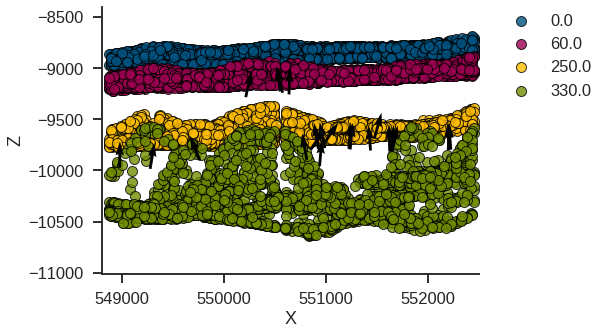

In [9]:
gp.plot.plot_data(geo_model, direction='y')

In [10]:
#gp.map_series_to_surfaces(geo_model, {'Default series':('0.0', '60.0', '250.0'), 'Uncomformity':'330'})
gp.map_series_to_surfaces(geo_model, {'Default series':(0.0, 60.0, 250.0), 'Uncomformity':330})

,surface,series,order_surfaces,isBasement,color,id
0,0,Default series,1,False,#015482,1
1,60,Default series,2,False,#9f0052,2
2,250,Default series,3,False,#ffbe00,3
3,330,Uncomformity,1,False,#728f02,4
4,basement,Basement,1,True,#443988,5


In [11]:
gp.set_interpolation_data(geo_model, grid=None, compile_theano=True, sparse_version=False)

Compiling theano function...
Compilation Done!


In [12]:
geo_model.interpolator.theano_graph.a_T.get_value()

array(0.6777017, dtype=float32)

In [13]:
# geo_model.interpolator.theano_graph.a_T.set_value(0.08)
# geo_model.interpolator.theano_graph.a_T_surface = theano.shared(np.array(0.08))

### Timing:

#### Sparse
- 2000 points, 1/6 range: 6,19s CPU --1,94 GPU
- 2000 points, 5% range: 2,19s CPU -- 1,16 GPU
- 10000 points, 1/6 range: 51.6s (2GB in solving) (in exporting 8GB) -- Out of memory GPU, 6300 MB
- 10000 points, 5% range: 37.6s 6500 MB -- Out of memory GPU, 6300 MB

#### Full GPU conf
- 2000 points, 5% range: 119ms GPU, 1067 MB
- 2000 points, 1/6 range: 121ms 
- 10000 points, 1/6 range: 394 ms GPU, 5081 MB
- 10000 points, 5% range: 378 ms GPU, 5081 MB


In [14]:
geo_model.update_to_interpolator()

True

In [31]:
val=.03
geo_model.interpolator.theano_graph.a_T.set_value(val)
geo_model.interpolator.theano_graph.a_T_surface.set_value(val)
s = gp.compute_model(geo_model, set_solutions=True)

In [32]:
geo_model.interpolator.theano_graph.nugget_effect_grad_T.get_value()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01], dtype=float32)

In [33]:
geo_model.orientations;

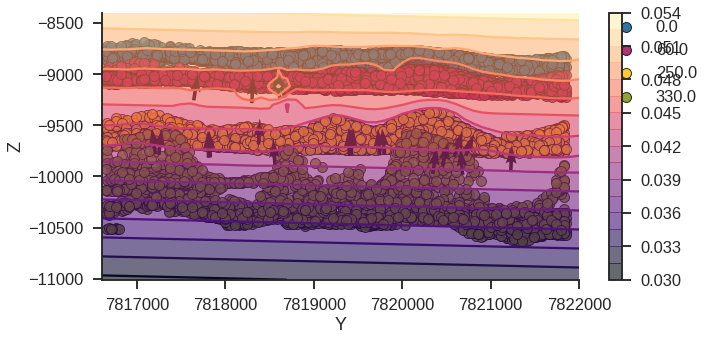

In [34]:
gp.plot.plot_scalar_field(geo_model, 16, series=0, direction='x')
#gp.plot.plot_scalar_field(geo_model, 16, series=1, direction='x')
plt.colorbar()

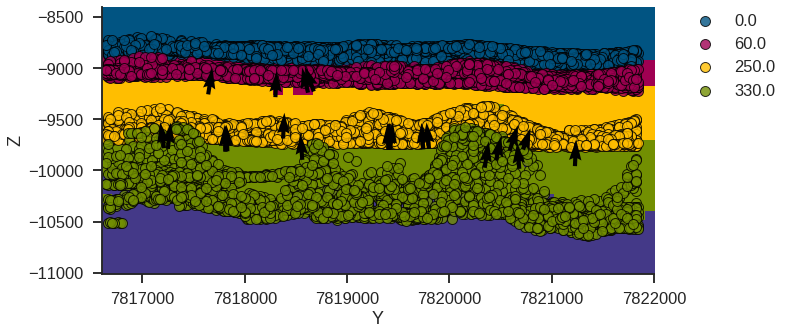

In [35]:
gp.plot.plot_section(geo_model,16, show_data=True, direction='x')

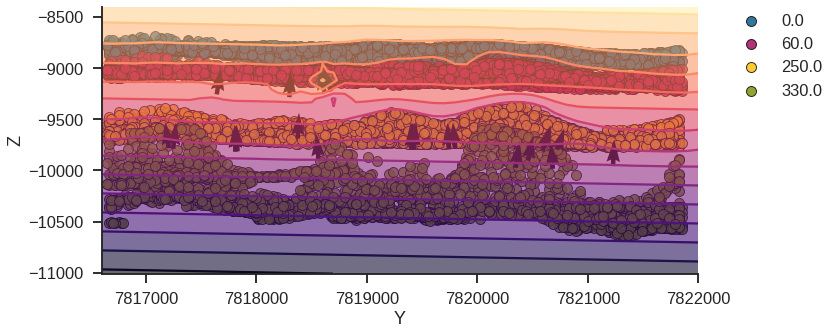

In [36]:
gp.plot.plot_scalar_field(geo_model, 16, series=0, direction='x')

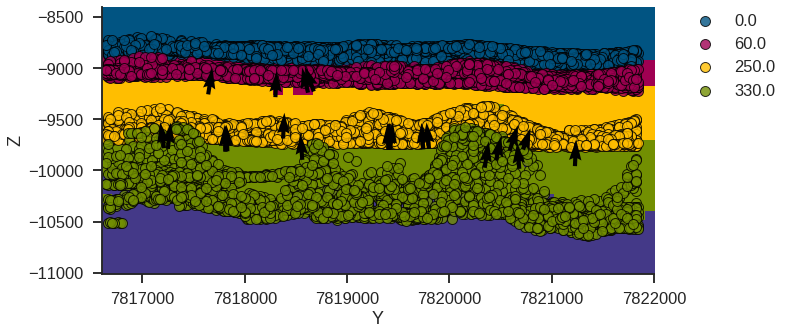

In [37]:
gp.plot.plot_section(geo_model,16, show_data=True, direction='x')

In [ ]:
gp.plot.plot_3D(geo_model, render_data=False)